<a href="https://colab.research.google.com/github/neizalazo/pneumonia/blob/main/pneumonia_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pneumonia Detection Challenge**
##Leveraging AI for Improved Pneumonia Detection


### **Project Overview**
The RSNA Pneumonia Detection Challenge hosted on Kaggle (https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview) aimed to develop an algorithm capable of detecting pneumonia from chest X-ray images. Pneumonia is a severe lung infection that affects millions of people worldwide, often leading to severe illness and mortality if not diagnosed and treated promptly. The challenge dataset comprises thousands of chest X-ray images labeled for the presence of pneumonia, providing an opportunity to develop machine learning models for accurate pneumonia detection.

### **Impact and Significance**
Pneumonia is a leading cause of morbidity and mortality globally, especially among children and the elderly. Early and accurate detection of pneumonia from medical images can significantly improve patient outcomes by enabling timely intervention and treatment. Machine learning models trained on chest X-ray images have the potential to assist healthcare professionals in diagnosing pneumonia more efficiently, particularly in resource-constrained settings where access to expert radiologists may be limited.
### **Approach and Technique**
The chosen approach for this project is Convolutional Neural Networks (CNNs), a type of deep learning algorithm well-suited for image classification tasks. CNNs are particularly effective in capturing spatial hierarchies and patterns within images, making them highly suitable for medical image analysis. This implementation uses a modified version of the ResNet-18 architecture as the backbone CNN model. ResNet-18 is a popular CNN architecture known for its depth and efficiency in learning feature representations from images.



### **Code Breakdown**

#### 1. Data Loading and Preprocessing
- **Install and import libraries**:

  DICOM Format: DICOM (Digital Imaging and Communications in Medicine) is the standard format for medical imaging data, including X-rays, CT scans, and MRIs. It stores the image data and metadata such as patient information, imaging parameters, and study details.






In [ ]:
## Necessary installations
!pip install opencv-python
!pip install pydicom
!pip install torchmetrics
!pip install pytorch_lightning
!pip install torch --extra-index-url https://download.pytorch.org/whl/cu116

## Importing libraries
from pathlib import Path  # Imported for path manipulation
import pydicom  # For reading DICOM files
import numpy as np  # For numerical operations
import cv2  # For image processing
import pandas as pd  # For handling data frames
import matplotlib.pyplot as plt  # For plotting
from tqdm.notebook import tqdm  # For progress bars
import torch  # For deep learning
print(torch.cuda.is_available()) #Check if cuda is being used
import torchvision  # For computer vision tasks
from torchvision import transforms  # For image transformations
import torchmetrics  # For evaluation metrics
import pytorch_lightning as pl  # For lightning framework
from pytorch_lightning.callbacks import ModelCheckpoint  # For model checkpointing
from pytorch_lightning.loggers import TensorBoardLogger  # For logging

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

- **Download Data**:

  - Importing the data from the RSNA Pneumonia Detection Challenge hosted on Kaggle (https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview)

Streaming output truncated to the last 5000 lines.
  inflating: stage_2_train_images/d5231546-354e-4071-9af1-6644beabfd86.dcm  
  inflating: stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: stage_2_train_images/d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc.dcm  
  inflating: stage_2_trai

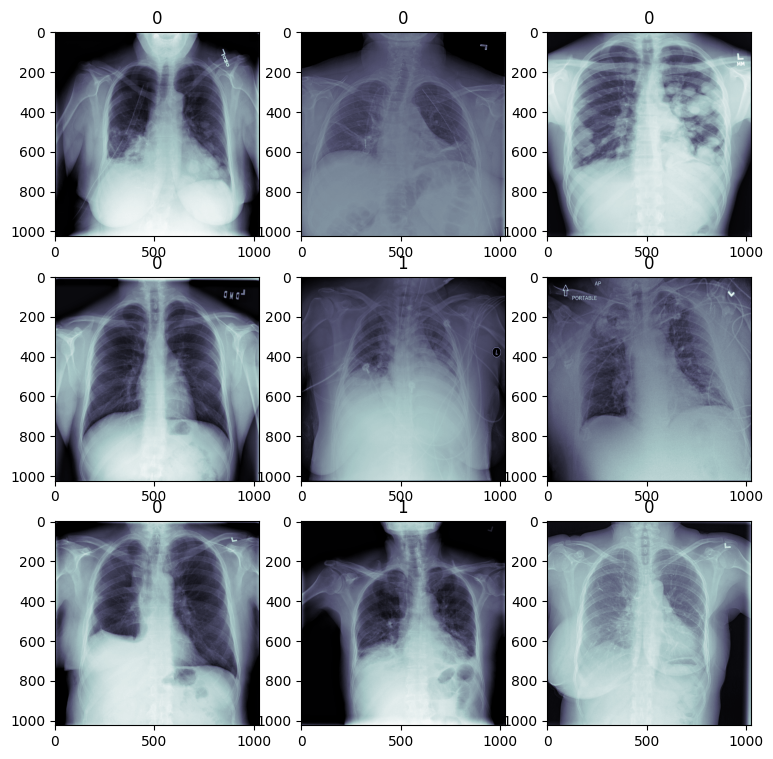

In [ ]:
## copy kaggle.json to /root/.kaggle/ folder so that kaggle cli can access it.
!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

!pip install kaggle
!kaggle competitions download -c rsna-pneumonia-detection-challenge
!unzip rsna-pneumonia-detection-challenge.zip

# Loading data
df_labels = pd.read_csv("/content/stage_2_train_labels.csv")  # Load CSV data

# Removing duplicate entries
df_labels = df_labels.drop_duplicates("patientId")  # Drop duplicate patient IDs

# Define paths
DATA_ROOT_PATH = Path("/content/stage_2_train_images/")  # Root directory for images
SAVE_PATH = Path("Processed/")  # Directory to save processed images

# Plotting sample images with labels
fig, axis = plt.subplots(3, 3, figsize=(9, 9))  # Create subplots for image display
counter = 0  # Counter for iterating through patient IDs
for i in range(3):  # Loop over rows
    for j in range(3):  # Loop over columns
        patient_id = df_labels.patientId.iloc[counter]  # Get patient ID
        dcm_path = DATA_ROOT_PATH / patient_id  # Get path to DICOM file
        dcm_path = dcm_path.with_suffix(".dcm")  # Change extension to .dcm
        dcm = pydicom.read_file(dcm_path).pixel_array  # Read DICOM file and extract pixel array

        label = df_labels["Target"].iloc[counter]  # Get label

        axis[i][j].imshow(dcm, cmap="bone")  # Display image
        axis[i][j].set_title(label)  # Set title as label
        counter += 1  # Increment counter

- **Data Preprocessing**:
  - **Normalization Significance**: Normalizing pixel values to a range of [0, 1] improves model convergence and performance by ensuring that gradients are within a manageable range during backpropagation. This prevents the saturation of activation functions and accelerates learning.
  - **Image Resizing**: Resizing images to a fixed dimension (e.g., 224x224) standardizes input dimensions across images, facilitating efficient batch processing and using pre-trained models that expect specific input sizes.

In [ ]:
# Preprocessing and saving images
sums = 0  # Variable to store sum of pixel values
sums_squared = 0  # Variable to store sum of squared pixel values

for counter, patient_id in enumerate(tqdm(df_labels.patientId)):  # Iterate over patient IDs with progress bar
    dcm_path = DATA_ROOT_PATH / patient_id  # Get path to DICOM file
    dcm_path = dcm_path.with_suffix(".dcm")  # Change extension to .dcm
    dcm = pydicom.read_file(dcm_path).pixel_array / 255  # Read DICOM file, normalize pixel values

    dcm_array = cv2.resize(dcm, (224, 224)).astype(np.float16)  # Resize image to (224, 224) and convert to float16

    label = df_labels.Target.iloc[counter]  # Get label

    train_or_val = "train" if counter < 24000 else "val"  # Determine whether data is for training or validation

    current_save_path = SAVE_PATH / train_or_val / str(label)  # Define path to save processed image
    current_save_path.mkdir(parents=True, exist_ok=True)  # Create directories if they don't exist
    np.save(current_save_path / patient_id, dcm_array)  # Save processed image

    normalizer = dcm_array.shape[0] * dcm_array.shape[1]  # Compute normalization factor
    if train_or_val == "train":  # If data is for training
        sums += np.sum(dcm_array) / normalizer  # Compute sum of pixel values
        sums_squared += (np.power(dcm_array, 2).sum()) / normalizer  # Compute sum of squared pixel values

mean = sums / 24000  # Compute mean of pixel values
std = np.sqrt(sums_squared / 24000 - (mean**2))  # Compute standard deviation of pixel values

print(f"Mean of Dataset: {mean}, STD: {std}")  # Print mean and standard deviation

  0%|          | 0/26684 [00:00<?, ?it/s]

Mean of Dataset: 0.4903962485384803, STD: 0.24795070634161256


- **Data Transformations**: Defines transformations for both training and validation datasets, including conversion to tensor, normalization, and augmentation for training data.

In [ ]:
# Define data transforms
train_transforms = transforms.Compose([  # Define transformations for training data
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(0.49, 0.248),  # Normalize image
    transforms.RandomAffine(degrees=(-5, 5), translate=(0, 0.05), scale=(0.9, 1.1)),  # Apply random affine transformation
    transforms.RandomResizedCrop((224, 224), scale=(0.35, 1))  # Apply random resized crop
])

val_transforms = transforms.Compose([  # Define transformations for validation data
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize([0.49], [0.248]),  # Normalize image
])

- **Custom DataLoader Function**: Defines a function to load numpy files containing preprocessed images.


- **Define Datasets**: Separate dataset in training and validation folders

There are 24000 train images and 2684 val images


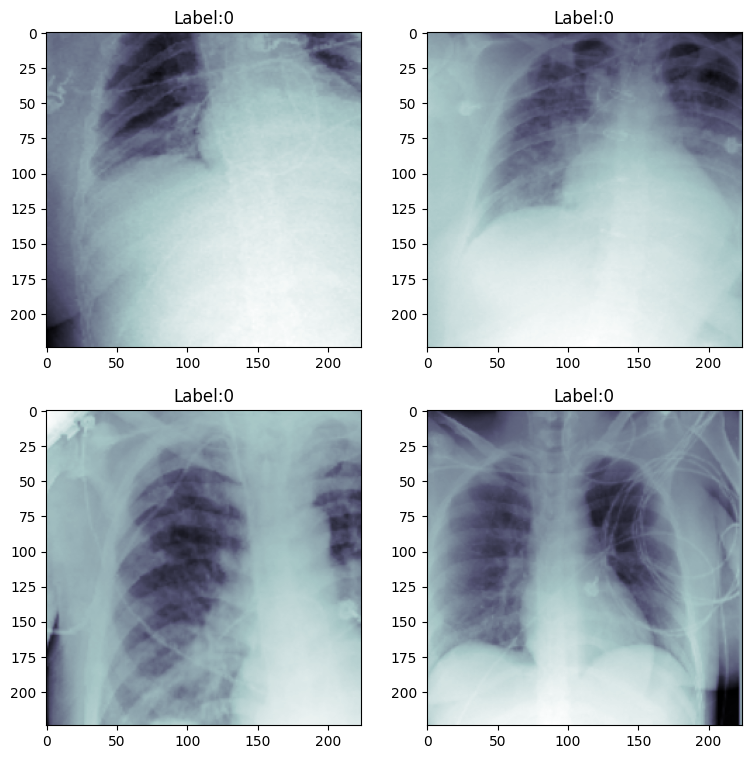

In [ ]:
# Custom DataLoader function
def load_file(path):  # Function to load numpy file
    return np.load(path).astype(np.float32)  # Load and return numpy file as float32

# Define datasets
train_dataset = torchvision.datasets.DatasetFolder(  # Define training dataset
    "Processed/train/",  # Path to training data
    loader=load_file, extensions="npy", transform=train_transforms)  # Use custom loader and transformations

val_dataset = torchvision.datasets.DatasetFolder(  # Define validation dataset
    "Processed/val/",  # Path to validation data
    loader=load_file, extensions="npy", transform=val_transforms)  # Use custom loader and transformations

# Plot sample images from the training dataset
fig, axis = plt.subplots(2, 2, figsize=(9, 9))  # Create subplots for image display
for i in range(2):  # Loop over rows
    for j in range(2):  # Loop over columns
        random_index = np.random.randint(0, 20000)  # Generate random index
        x_ray, label = train_dataset[random_index]  # Get random sample from training dataset
        axis[i][j].imshow(x_ray[0], cmap="bone")  # Display image
        axis[i][j].set_title(f"Label:{label}")  # Set title as label

# Define DataLoader parameters
batch_size = 64  # Batch size for DataLoader
num_workers = 0  # Number of CPU workers for DataLoader (set to 0 for GPU)

# Create DataLoader instances
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)  # Create DataLoader for training data
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=False)  # Create DataLoader for validation data

print(f"There are {len(train_dataset)} train images and {len(val_dataset)} val images")  # Print number of train and validation images


#### 2. Model Definition
- **Loss Function and Optimizer**:
  - **Loss Function Explanation**: A loss function quantifies the model's prediction error during training by comparing predicted outputs with ground-truth labels. It guides the optimization process by providing a measure of the model's performance. Binary Cross-Entropy Loss with logits is preferred for binary classification tasks as it effectively penalizes misclassifications and produces stable gradients during training.
  - **Optimizer Significance**: An optimizer adjusts the model's parameters (e.g., weights) during training to minimize the loss function. Choosing an appropriate optimizer impacts convergence speed and final performance by determining the direction and magnitude of parameter updates. Adam optimizer is chosen for its adaptive learning rate capabilities, which can lead to faster convergence and better generalization.




In [ ]:
# Model definition
class PneumoniaModel(pl.LightningModule):  # Define PneumoniaModel class inheriting from LightningModule
    def __init__(self, weight=3):  # Constructor
        super().__init__()  # Call superclass constructor

        self.model = torchvision.models.resnet18()  # Load pre-trained ResNet18 model
        self.model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)  # Modify first convolutional layer
        self.model.fc = torch.nn.Linear(in_features=512, out_features=1, bias=True)  # Modify fully connected layer

        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-4)  # Define optimizer
        self.loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([weight]))  # Define loss function

        self.train_f1 = torchmetrics.F1Score(task="BINARY")  # Define f1score metric for training
        self.val_f1 = torchmetrics.F1Score(task="BINARY")  # Define f1score metric for validation

    def forward(self, data):  # Forward pass method
        pred = self.model(data)  # Forward pass through the model
        return pred  # Return predictions

    def training_step(self, batch, batch_idx):  # Training step method
        x_ray, label = batch  # Unpack batch
        label = label.float()  # Convert label to float
        pred = self(x_ray)[:,0]  # Get model predictions
        loss = self.loss_fn(pred, label)  # Compute loss

        self.log("Train Loss", loss)  # Log training loss
        self.log("Step Train F1", self.train_f1(torch.sigmoid(pred), label.int()))  # Log training f1score
        return loss  # Return loss

    def on_train_epoch_end(self):  # Method executed at the end of each training epoch
        self.log("Train F1", self.train_f1.compute())  # Log training f1score

    def validation_step(self, batch, batch_idx):  # Validation step method
        x_ray, label = batch  # Unpack batch
        label = label.float()  # Convert label to float
        pred = self(x_ray)[:,0]  # Get model predictions
        loss = self.loss_fn(pred, label)  # Compute loss

        self.log("Val Loss", loss)  # Log validation loss
        self.log("Step Val F1", self.val_f1(torch.sigmoid(pred), label.int()))  # Log validation f1score

    def on_validation_epoch_end(self):  # Method executed at the end of each validation epoch
        self.log("Val F1", self.val_f1.compute())  # Log validation f1score

    def configure_optimizers(self):  # Method to configure optimizers
        return [self.optimizer]  # Return optimizer



#### 3. Training
- **Training Loop**:
  - **Epochs Selection**: Training is conducted over 35 epochs, allowing the model to learn complex patterns from the data over multiple passes iteratively. Each epoch represents one complete iteration through the entire dataset.
- **Metrics**: F1 score is chosen as the metric for training evaluation due to its ability to balance precision and recall, especially in imbalanced datasets like medical image classification.


In [ ]:
# Model instantiation
model = PneumoniaModel()  # Create an instance of PneumoniaModel

# Checkpoint callback
checkpoint_callback = ModelCheckpoint(  # Define model checkpoint callback
    monitor='Val F1',  # Monitor validation f1score
    save_top_k=10,  # Save top 10 models
    mode='max')  # Save based on maximum validation f1score

# Trainer configuration
gpus = 1  # Number of GPUs to use (set to 1 for Google Colab GPU)
trainer = pl.Trainer(logger=TensorBoardLogger(save_dir="./logs"), log_every_n_steps=1,  # Define Lightning Trainer
                     callbacks=checkpoint_callback, max_epochs=35, devices="auto", accelerator="gpu")  # Pass logger, callbacks, max epochs, and number of GPUs

# Train the model
trainer.fit(model, train_loader, val_loader)  # Train the model using the provided data loaders

# Copy checkpoints to drive so they are not deleted when google colab session ends
!mv ./logs/lightning_logs/version_0/checkpoints/* ./drive/MyDrive/DataScience/Capstone/checkpoints/

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     | Type              | Params
-----------------------------------------------
0 | model    | ResNet            | 11.2 M
1 | loss_fn  | BCEWithLogitsLoss | 0     
2 | train_f1 | BinaryF1Score     | 0     
3 | val_f1   | BinaryF1Score     | 0     
-----------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.683    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=35` reached.


#### 4. Evaluation
Once trained, the model is evaluated on a separate validation dataset to assess its performance. Various evaluation metrics such as accuracy, precision, recall, and F1-score are computed to gauge the model's effectiveness in pneumonia detection.

  - **Accuracy**: Accuracy measures the proportion of correctly predicted samples out of all samples. In this project, accuracy reflects the overall correctness of pneumonia detection predictions.
  - **Precision**: Precision quantifies the proportion of true positive predictions among all positive predictions. It indicates the model's ability to avoid false positives, i.e., correctly identifying pneumonia cases.
  - **Recall**: Recall calculates the proportion of true positive predictions among all actual positive cases. It assesses the model's ability to detect all pneumonia cases without missing any (i.e., minimizing false negatives).
  - **F1 Score**: The F1 score is the harmonic mean of precision and recall, balancing the two metrics. It considers both false positives and false negatives and is suitable for evaluating models on imbalanced datasets, such as this pneumonia detection task.

In [ ]:
### Model Results with weighted loss
import os

checkpoint_folder = "./drive/MyDrive/DataScience/Capstone/checkpoints/"

for file_name in os.listdir(checkpoint_folder):
    if file_name.endswith(".ckpt"):  # Check if the file is a checkpoint file
        checkpoint_path = os.path.join(checkpoint_folder, file_name)

        # Load the trained model
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model = PneumoniaModel.load_from_checkpoint(checkpoint_path)
        model.eval()
        model.to(device)

        # Evaluate the model
        preds = []
        labels = []

        with torch.no_grad():
            for data, label in tqdm(val_dataset):
                data = data.to(device).float().unsqueeze(0)
                pred = torch.sigmoid(model(data)[0].cpu())
                preds.append(pred)
                labels.append(label)

        preds = torch.tensor(preds)
        labels = torch.tensor(labels).int()

        # Compute evaluation metrics
        acc = torchmetrics.Accuracy(task="BINARY")(preds, labels)
        precision = torchmetrics.Precision(task="BINARY")(preds, labels)
        recall = torchmetrics.Recall(task="BINARY")(preds, labels)
        f1score = torchmetrics.F1Score(task="BINARY")(preds, labels)
        cm = torchmetrics.ConfusionMatrix(task="binary", num_classes=2)(preds, labels)
        cm_threshed = torchmetrics.ConfusionMatrix(task="binary", num_classes=2, threshold=0.25)(preds, labels)

        # Print evaluation metrics
        print(f"Checkpoint: {checkpoint_path}")
        print(f"Val Accuracy: {acc}")
        print(f"Val Precision: {precision}")
        print(f"Val Recall: {recall}")
        print(f"Val F1Score: {f1score}")
        print(f"Confusion Matrix:\n {cm}")
        print(f"Confusion Matrix 2:\n {cm_threshed}")

# end of loop



  0%|          | 0/2684 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=24-step=9375.ckpt
Val Accuracy: 0.8248882293701172
Val Precision: 0.5824176073074341
Val Recall: 0.7884297370910645
Val F1Score: 0.6699438095092773
Confusion Matrix:
 tensor([[1737,  342],
        [ 128,  477]])
Confusion Matrix 2:
 tensor([[1395,  684],
        [  45,  560]])


  0%|          | 0/2684 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=25-step=9750.ckpt
Val Accuracy: 0.808867335319519
Val Precision: 0.5552884340286255
Val Recall: 0.7636363506317139
Val F1Score: 0.6430062651634216
Confusion Matrix:
 tensor([[1709,  370],
        [ 143,  462]])
Confusion Matrix 2:
 tensor([[1370,  709],
        [  50,  555]])


  0%|          | 0/2684 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=26-step=10125.ckpt
Val Accuracy: 0.7947093844413757
Val Precision: 0.529411792755127
Val Recall: 0.8033058047294617
Val F1Score: 0.6382140517234802
Confusion Matrix:
 tensor([[1647,  432],
        [ 119,  486]])
Confusion Matrix 2:
 tensor([[1222,  857],
        [  33,  572]])


  0%|          | 0/2684 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=27-step=10500.ckpt
Val Accuracy: 0.7988077402114868
Val Precision: 0.5363128781318665
Val Recall: 0.7933884263038635
Val F1Score: 0.6399999856948853
Confusion Matrix:
 tensor([[1664,  415],
        [ 125,  480]])
Confusion Matrix 2:
 tensor([[1402,  677],
        [  55,  550]])


  0%|          | 0/2684 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=28-step=10875.ckpt
Val Accuracy: 0.8181818127632141
Val Precision: 0.5737704634666443
Val Recall: 0.7520661354064941
Val F1Score: 0.6509299278259277
Confusion Matrix:
 tensor([[1741,  338],
        [ 150,  455]])
Confusion Matrix 2:
 tensor([[1443,  636],
        [  66,  539]])


  0%|          | 0/2684 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=30-step=11625.ckpt
Val Accuracy: 0.7961996793746948
Val Precision: 0.5304622054100037
Val Recall: 0.8347107172012329
Val F1Score: 0.6486833691596985
Confusion Matrix:
 tensor([[1632,  447],
        [ 100,  505]])
Confusion Matrix 2:
 tensor([[1236,  843],
        [  26,  579]])


  0%|          | 0/2684 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=31-step=12000.ckpt
Val Accuracy: 0.7876303791999817
Val Precision: 0.51871657371521
Val Recall: 0.8016529083251953
Val F1Score: 0.6298701167106628
Confusion Matrix:
 tensor([[1629,  450],
        [ 120,  485]])
Confusion Matrix 2:
 tensor([[1296,  783],
        [  39,  566]])


  0%|          | 0/2684 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=32-step=12375.ckpt
Val Accuracy: 0.7846497893333435
Val Precision: 0.5138745903968811
Val Recall: 0.8264462947845459
Val F1Score: 0.6337135434150696
Confusion Matrix:
 tensor([[1606,  473],
        [ 105,  500]])
Confusion Matrix 2:
 tensor([[1250,  829],
        [  38,  567]])


  0%|          | 0/2684 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=33-step=12750.ckpt
Val Accuracy: 0.814828634262085
Val Precision: 0.5727762579917908
Val Recall: 0.702479362487793
Val F1Score: 0.6310319304466248
Confusion Matrix:
 tensor([[1762,  317],
        [ 180,  425]])
Confusion Matrix 2:
 tensor([[1524,  555],
        [  93,  512]])


  0%|          | 0/2684 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=34-step=13125.ckpt
Val Accuracy: 0.804768979549408
Val Precision: 0.5459704995155334
Val Recall: 0.7950413227081299
Val F1Score: 0.6473755240440369
Confusion Matrix:
 tensor([[1679,  400],
        [ 124,  481]])
Confusion Matrix 2:
 tensor([[1386,  693],
        [  51,  554]])


  0%|          | 0/2684 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=22-step=8625.ckpt
Val Accuracy: 0.8043964505195618
Val Precision: 0.5454545617103577
Val Recall: 0.7933884263038635
Val F1Score: 0.6464646458625793
Confusion Matrix:
 tensor([[1679,  400],
        [ 125,  480]])
Confusion Matrix 2:
 tensor([[1331,  748],
        [  51,  554]])


  0%|          | 0/2684 [00:00<?, ?it/s]

Checkpoint: ./drive/MyDrive/DataScience/Capstone/checkpoints/epoch=29-step=11250.ckpt
Val Accuracy: 0.6616989374160767
Val Precision: 0.3936842083930969
Val Recall: 0.9272727370262146
Val F1Score: 0.5527093410491943
Confusion Matrix:
 tensor([[1215,  864],
        [  44,  561]])
Confusion Matrix 2:
 tensor([[ 557, 1522],
        [   2,  603]])


#### 5. Class Activation Mapping (CAM):
  - **CAM Concept**: Class Activation Mapping (CAM) is a technique used to visualize the regions of an image that are most relevant to a particular class prediction. It highlights the areas of an image that contributed most to the model's decision-making process.
  - **CAM Implementation**: CAM is applied to visualize which regions of the X-ray images contribute most to the pneumonia detection predictions. This technique helps interpret the model's decisions and provides insights into its reasoning process.

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:184: Found keys that are in the model state dict but not in the checkpoint: ['feature_map.0.weight', 'feature_map.1.weight', 'feature_map.1.bias', 'feature_map.1.running_mean', 'feature_map.1.running_var', 'feature_map.4.0.conv1.weight', 'feature_map.4.0.bn1.weight', 'feature_map.4.0.bn1.bias', 'feature_map.4.0.bn1.running_mean', 'feature_map.4.0.bn1.running_var', 'feature_map.4.0.conv2.weight', 'feature_map.4.0.bn2.weight', 'feature_map.4.0.bn2.bias', 'feature_map.4.0.bn2.running_mean', 'feature_map.4.0.bn2.running_var', 'feature_map.4.1.conv1.weight', 'feature_map.4.1.bn1.weight', 'feature_map.4.1.bn1.bias', 'feature_map.4.1.bn1.running_mean', 'feature_map.4.1.bn1.running_var', 'feature_map.4.1.conv2.weight', 'feature_map.4.1.bn2.weight', 'feature_map.4.1.bn2.bias', 'feature_map.4.1.bn2.running_mean', 'feature_map.4.1.bn2.running_var', 'feature_map.5.0.conv1.weight', 'feature_map.5.0.bn1.weight', 'feature_map.5.

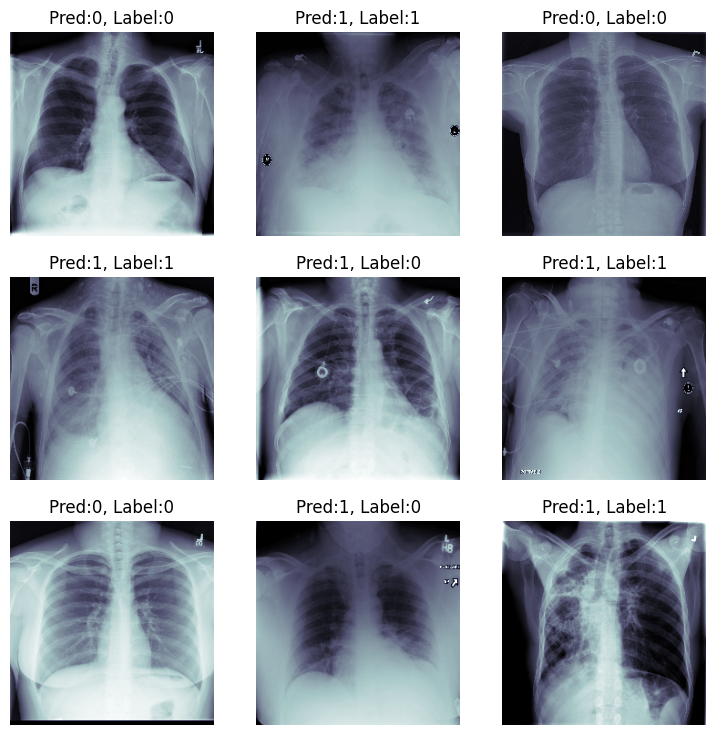

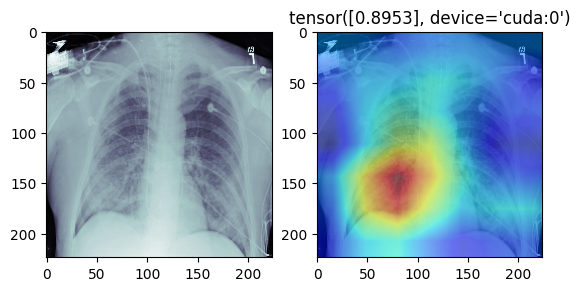

In [ ]:
# Visualize predicted images
fig, axis = plt.subplots(3, 3, figsize=(9, 9))  # Create subplots for image display

for i in range(3):  # Loop over rows
    for j in range(3):  # Loop over columns
        rnd_idx = np.random.randint(0, len(preds))  # Generate random index
        axis[i][j].imshow(val_dataset[rnd_idx][0][0], cmap="bone")  # Display image
        axis[i][j].set_title(f"Pred:{int(preds[rnd_idx] > 0.5)}, Label:{labels[rnd_idx]}")  # Set title with prediction and label
        axis[i][j].axis("off")  # Turn off axis

#########################################################################

# Custom DataLoader function
def load_file(path):  # Function to load numpy file
    return np.load(path).astype(np.float32)  # Load and return numpy file as float32

# Define transforms for visualization
val_transforms = transforms.Compose([  # Define transformations for validation data
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(0.49, 0.248),  # Normalize image
])

# Load validation dataset
val_dataset = torchvision.datasets.DatasetFolder("Processed/val/", loader=load_file, extensions="npy", transform=val_transforms)

# Define ResNet model
temp_model = torchvision.models.resnet18()

# Extract convolutional layers
list(temp_model.children())[:-2]

# Define a feature extraction model
feature_extractor = torch.nn.Sequential(*list(temp_model.children())[:-2])

# Define CAM model
class CAMModel(pl.LightningModule):
    def __init__(self):
        super().__init__()

        self.model = torchvision.models.resnet18()
        self.model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.model.fc = torch.nn.Linear(in_features=512, out_features=1)
        self.feature_map = torch.nn.Sequential(*list(self.model.children())[:-2])

    def forward(self, data):
        feature_map = self.feature_map(data)
        avg_pool_output = torch.nn.functional.adaptive_avg_pool2d(input=feature_map, output_size=(1, 1))
        avg_pool_output_flattened = torch.flatten(avg_pool_output)
        pred = self.model.fc(avg_pool_output_flattened)
        return pred, feature_map

# Define function for CAM computation
def cam(model, img):
    with torch.no_grad():
        pred, features = model(img.unsqueeze(0))
    features = features.reshape((512, 49))
    weight_params = list(model.model.fc.parameters())[0]
    weight = weight_params[0].detach()

    cam = torch.matmul(weight, features)
    cam_img = cam.reshape(7, 7).cpu()
    return cam_img, torch.sigmoid(pred)

# Load trained model
model = CAMModel.load_from_checkpoint("./drive/MyDrive/DataScience/Capstone/checkpoints_F1/epoch=27-step=10500.ckpt", strict=False)
model.eval();

# Define CAM visualization function
def visualize(img, cam, pred):
    img = img[0]
    cam = transforms.functional.resize(cam.unsqueeze(0), (224, 224))[0]

    fig, axis = plt.subplots(1, 2)
    axis[0].imshow(img, cmap="bone")
    axis[1].imshow(img, cmap="bone")
    axis[1].imshow(cam, alpha=0.5, cmap="jet")
    plt.title(pred)

# Select an image for CAM visualization
img = val_dataset[-6][0]

# Move the input tensor to the same device as the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
img = img.to(device)

activation_map, pred = cam(model, img)
visualize(img.cpu(), activation_map.cpu(), pred)  # Visualize CAM


### **Conclusion**
In conclusion, this project demonstrates the application of deep learning techniques, specifically CNNs, for pneumonia detection from chest X-ray images. By leveraging state-of-the-art algorithms and methodologies, machine learning models can play a vital role in helping healthcare professionals diagnose and manage pneumonia more effectively, ultimately leading to improved patient care and outcomes.